# First Practical Work

## Data Science and Engineering

### DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

**Full name:** Andrew Sivak
    
**NIA** :** 100520897 

In [42]:
import numpy as np
import multiprocessing as mp
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile
import image_filter as my

In [43]:
import importlib

In [331]:
importlib.reload(my)

<module 'image_filter' from 'C:\\Users\\andro\\Massive Computing\\Practical Work 01\\Practical Work 01\\image_filter.py'>

In [148]:
F_IMAGE1="chess.jpg"
F_IMAGE2="fence.jpg"

In [170]:
image1= np.array(Image.open(F_IMAGE1))
image2= np.array(Image.open(F_IMAGE2))

In [275]:
filter1=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])
filter2=np.array([0.5, 0 , -0.5])
filter3=np.array([[0.5],[0],[-0.5]])

filter4=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
filter5=np.array([
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]
])

In [24]:
NUMPROCESS=4

In [33]:
filtered_image1_VECTOR=filter1
filtered_image2_VECTOR=filter1

In [35]:
def tonumpyarray(mp_arr):
    #mp_array is a shared memory array with lock
    
    return np.frombuffer(mp_arr.get_obj(),dtype=np.uint8)

# AFTER THIS CELL YOU HAVE TO WRITE YOUR CODE

After this cell you have to use the preloaded image defined in the F_IMAGE variable, select two of the 5 filter predefined, and using the NUMPROCESS processors, apply the filters to the image and check results.

* The first filter is impulse response filter (the image output must be equals to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

In [36]:
#YOUR CODE MUST BE START HERE

In [340]:
filtered_image
filter_o = my.image_filter(image1,filter4,NUMPROCESS,filtered_image)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
3 3
1 1


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('int16') to dtype('uint8') with casting rule 'same_kind'

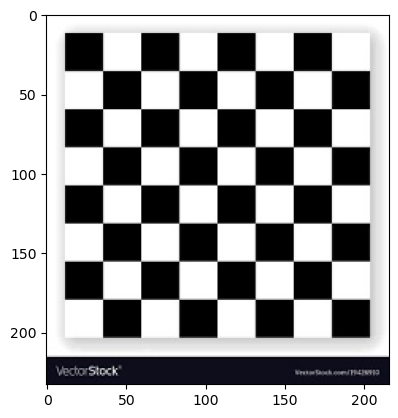

In [337]:
plt.figure()
plt.imshow(image1)

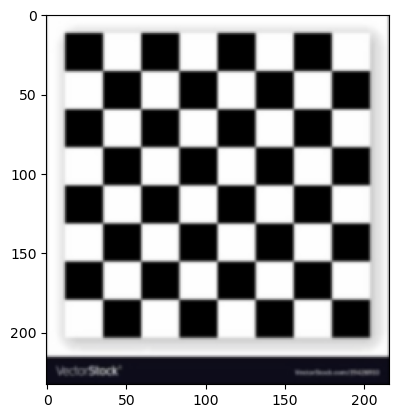

In [338]:
plt.figure()
plt.imshow(filtered_image)

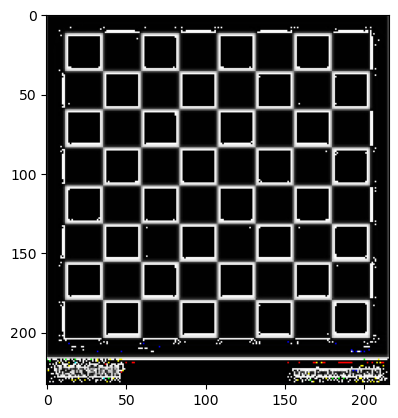

In [339]:
plt.figure()
plt.imshow(image1-filtered_image)

In [37]:
#YOUR CODE MUST END HERE

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

In [38]:
filtered_image1=tonumpyarray(filtered_image1_VECTOR).reshape(image1.shape)
filtered_image2=tonumpyarray(filtered_image2_VECTOR).reshape(image2.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'get_obj'

In [39]:
plt.figure()
plt.imshow(filtered_image1)

NameError: name 'filtered_image1' is not defined

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure()
plt.imshow(filtered_image2)

NameError: name 'filtered_image2' is not defined

<Figure size 640x480 with 0 Axes>